In this part of the exercise, you will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA).  
During QA, each microchip goes through various tests to ensure it is functioning correctly.  
From these two tests, you would like to determine whether the microchips should be accepted or rejected

In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
def load_data():
    data=np.loadtxt(r'C:/Users/pedro\source/repos/PedroCorreia07/Machine Learing Specialization_Coursera/Course 1\data_logistic regression/ex2data2.txt', delimiter=',')
    X=data[:,:2] #creates a new NumPy array X which contains all the rows of data, but only the first two columns (0 and 1). Here, the syntax [:,:2] means to select all rows (:) and the first two columns (:2), so it effectively selects only the feature columns.
    y=data[:,2] #creates a new NumPy array y which contains all the rows of data, but only the third column (2). So, it effectively selects only the target column
    return X,y

In [30]:
X,y=load_data()

In [31]:
import pandas as pd
df=pd.DataFrame({'X1':X[:,0],'X2':X[:,1],'y':y})
msk=np.random.rand(len(df))<0.8
train=df[msk]
test=df[~msk]

X_train=train[['X1','X2']]
y_train=train['y']

X_test=test[['X1','X2']]
y_test=test[['y']]

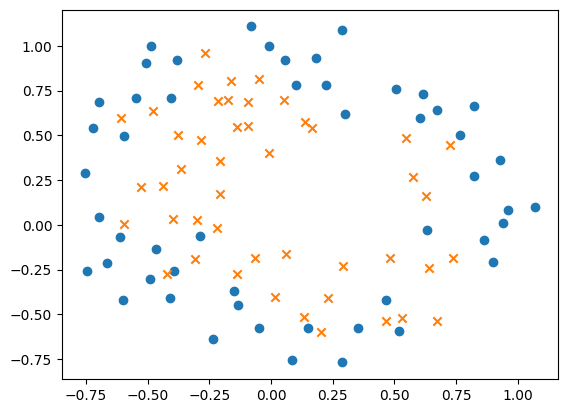

In [32]:
#Plotting the data points
plt.scatter(X_train[y_train==0]['X1'],X_train[y_train==0]['X2'],label='Class 0',marker='o')
plt.scatter(X_train[y_train==1]['X1'],X_train[y_train==1]['X2'],label='Class 1',marker='x')
plt.show()

Regularized Logistic Regression with the L2 regularization  
  


penalty='l2' (Ridge regularization) is used in this code to apply L2 regularization to the logistic regression model  

L2 regularization is particularly useful when dealing with datasets that have multicollinearity (high correlation) among the features.   

It helps to stabilize the model and make it less sensitive to small changes in the input data.  

The parameter C is the inverse of the regularization strength, where a smaller value of C corresponds to stronger regularization.  
In the case of logistic regression, C is a hyperparameter that controls the trade-off between fitting the training data and reducing the magnitude of the coefficients (weights).  

When C is set to a lower value, such as C = 0.1 or C = 0.01, it indicates a stronger regularization strength. 

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

#Create polynomial features because the data is in a different pattern (circles)
degree=2 #degree of polynomia features
poly_features=PolynomialFeatures(degree=degree) #The PolynomialFeatures class is used to generate polynomial features from the input data
X_train_poly=poly_features.fit_transform(X_train) # This method fits the polynomial features transformer to the training data (X_train) and transforms the data by generating polynomial features. The resulting X_train_poly is a new array that includes the original features of X_train as well as the polynomial features.

lr_model=LogisticRegression(penalty='l2',C=1.0) #L2 Regularization (Ridge)
lr_model.fit(X_train_poly,y_train)     

LogisticRegression()

In [34]:
y_pred=lr_model.predict(X_train_poly)
print("Prediction on training set:",y_pred)

Prediction on training set: [1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 1.]


c:\Users\pedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


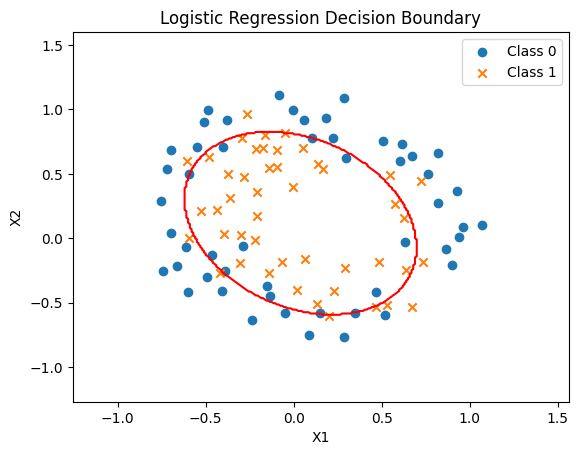

In [36]:
#Plotting the data points + plotting the decision boundary
plt.scatter(X_train[y_train==0]['X1'],X_train[y_train==0]['X2'],label='Class 0',marker='o')
plt.scatter(X_train[y_train==1]['X1'],X_train[y_train==1]['X2'],label='Class 1',marker='x')

x1_min,x1_max=X_train['X1'].min()-0.5,X_train['X1'].max()+0.5 #define the plot window||Adding a margin of 0.5 to the minimum and maximum values in x1_min and x1_max (and similarly for x2_min and x2_max) helps in providing a bit of padding around the data points when plotting the decision boundary.
x2_min,x2_max=X_train['X2'].min()-0.5,X_train['X2'].max()+0.5

#The meshgrid function is used to create a grid of points within the specified ranges x1_min to x1_max and x2_min to x2_max. 
xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,0.01),np.arange(x2_min,x2_max,0.01))

#Flatten and stack the grid ponts into a 2-dimensiional array
grid_points=np.c_[xx1.ravel(),xx2.ravel()] #The grid points are flattened and stacked horizontally using np.c_ before making the predictions. The np.c_ is a function provided by NumPy that is used for concatenating arrays along the second axis. xx1.ravel() and xx2.ravel() are 2-dimensional arrays representing the coordinates of the grid points. The ravel() method is used to flatten these arrays into 1-dimensional arrays. By passing xx1.ravel() and xx2.ravel() as arguments to np.c_, the function concatenates them column-wise, resulting in a new 2-dimensional array where each row represents a point on the grid.
grid_points_poly=poly_features.transform(grid_points)

#This line predicts the class labels for the grid points (xx1 and xx2) by using the trained logistic regression model (lr_model) and the predict method.
Z=lr_model.predict(grid_points_poly) 

#This line reshapes the predicted class labels (Z) to have the same shape as the grid points (xx1). It ensures that the predicted labels can be plotted as a contour.
Z=Z.reshape(xx1.shape)

#Set the contour where everything <0.5 is 0 and everything >0.5 is 1
plt.contour(xx1,xx2,Z,levels=[0.5],colors='r')

#Add labels, title and legend
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Logistic Regression Decision Boundary')
plt.legend()

plt.show()

In [ ]:
print("Accuracy on training set:",lr_model.score(X_train_poly,y_train))

Accuracy on training set: 0.8061224489795918
